In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Pra prosesing data

##### Menghapus kolom Tanggal

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UAS/Survei_IMT.csv')
df.drop('Timestamp', axis=1, inplace=True)

##### Mengubah nilai yang salah dengan MEAN

In [ ]:
df.isna().sum()

Nama Lengkap         0
NIM                  0
Prodi                0
Umur                 0
Jenis Kelamin        0
Berat Badan (kg)     0
Tinggi Badan (cm)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nama Lengkap       50 non-null     object
 1   NIM                50 non-null     int64 
 2   Prodi              50 non-null     object
 3   Umur               50 non-null     object
 4   Jenis Kelamin      50 non-null     object
 5   Berat Badan (kg)   50 non-null     object
 6   Tinggi Badan (cm)  50 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:
df['Tinggi Badan (cm)'] = pd.to_numeric(df['Tinggi Badan (cm)'], errors='coerce')
df['Berat Badan (kg)'] = pd.to_numeric(df['Berat Badan (kg)'], errors='coerce') 

In [ ]:
df['Berat Badan (kg)'] = df['Berat Badan (kg)'].replace(np.NaN, df['Berat Badan (kg)'].mean())
df['Tinggi Badan (cm)'] = df['Tinggi Badan (cm)'].replace(np.NaN, df['Tinggi Badan (cm)'].mean())

#####Menambahkan Kolom IMT & Kategori

In [ ]:
df['Berat Badan (kg)'] = np.floor(pd.to_numeric(df['Berat Badan (kg)'])).astype('int64')
df['Tinggi Badan (cm)'] = np.floor(pd.to_numeric(df['Tinggi Badan (cm)'])).astype('int64')

In [ ]:
df['Tinggi Badan (cm)'] = (df['Tinggi Badan (cm)']/100)

In [ ]:
df['IMT'] = df['Berat Badan (kg)']/(df['Tinggi Badan (cm)']*df['Tinggi Badan (cm)'])
df

,Nama Lengkap,NIM,Prodi,Umur,Jenis Kelamin,Berat Badan (kg),Tinggi Badan (cm),IMT
0,Abdul Rosyad,192410101059,Sistem Informasi,20 tahun,Laki - laki,50,1.60,19.531250
1,Bismaka Aurent Faradyan,202410101089,Sistem Informasi,19 tahun,Laki - laki,55,1.70,19.031142
2,Marizka Maulidina,202410103009,Informatika,20 tahun,Perempuan,38,1.48,17.348430
3,Fajri Sahrul Qur'ani,202410101046,Sistem Informasi,20 tahun,Laki - laki,55,1.65,20.202020
4,sakti prakasa,182410102089,Teknologi Informasi,22 tahun,Laki - laki,80,1.70,27.681661
5,Martin Chandra,202410103032,Informatika,18 tahun,Laki - laki,52,1.75,16.979592
6,Edwin Tri Maulana,202410102028,Teknologi Informasi,20 tahun,Laki - laki,50,1.70,17.301038
7,Melina CW,182410102001,Teknologi Informasi,21 tahun,Perempuan,54,1.66,19.596458
8,Laida Lavenia,202410102041,Teknologi Informasi,20 tahun,Perempuan,44,1.50,19.555556
9,Adhitya,202410101103,Sistem Informasi,20 tahun,Laki - laki,56,1.67,20.079601


In [ ]:
df['IMT'] = np.floor(pd.to_numeric(df['IMT'])).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama Lengkap       50 non-null     object 
 1   NIM                50 non-null     int64  
 2   Prodi              50 non-null     object 
 3   Umur               50 non-null     object 
 4   Jenis Kelamin      50 non-null     object 
 5   Berat Badan (kg)   50 non-null     int64  
 6   Tinggi Badan (cm)  50 non-null     float64
 7   IMT                50 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.2+ KB


In [ ]:
df['Kategori'] = df['Berat Badan (kg)']/(df['Tinggi Badan (cm)']*df['Tinggi Badan (cm)'])
df

,Nama Lengkap,NIM,Prodi,Umur,Jenis Kelamin,Berat Badan (kg),Tinggi Badan (cm),IMT,Kategori
0,Abdul Rosyad,192410101059,Sistem Informasi,20 tahun,Laki - laki,50,1.60,19.0,19.531250
1,Bismaka Aurent Faradyan,202410101089,Sistem Informasi,19 tahun,Laki - laki,55,1.70,19.0,19.031142
2,Marizka Maulidina,202410103009,Informatika,20 tahun,Perempuan,38,1.48,17.0,17.348430
3,Fajri Sahrul Qur'ani,202410101046,Sistem Informasi,20 tahun,Laki - laki,55,1.65,20.0,20.202020
4,sakti prakasa,182410102089,Teknologi Informasi,22 tahun,Laki - laki,80,1.70,27.0,27.681661
5,Martin Chandra,202410103032,Informatika,18 tahun,Laki - laki,52,1.75,16.0,16.979592
6,Edwin Tri Maulana,202410102028,Teknologi Informasi,20 tahun,Laki - laki,50,1.70,17.0,17.301038
7,Melina CW,182410102001,Teknologi Informasi,21 tahun,Perempuan,54,1.66,19.0,19.596458
8,Laida Lavenia,202410102041,Teknologi Informasi,20 tahun,Perempuan,44,1.50,19.0,19.555556
9,Adhitya,202410101103,Sistem Informasi,20 tahun,Laki - laki,56,1.67,20.0,20.079601


In [ ]:
df.loc[df['Kategori'] < 18, 'Kategori'] = 1
df.loc[df['Kategori'] > 30, 'Kategori'] = 4
df.loc[df['Kategori'] > 23, 'Kategori'] = 3
df.loc[df['Kategori'] > 18, 'Kategori'] = 2
df

,Nama Lengkap,NIM,Prodi,Umur,Jenis Kelamin,Berat Badan (kg),Tinggi Badan (cm),IMT,Kategori
0,Abdul Rosyad,192410101059,Sistem Informasi,20 tahun,Laki - laki,50,1.60,19.0,2.0
1,Bismaka Aurent Faradyan,202410101089,Sistem Informasi,19 tahun,Laki - laki,55,1.70,19.0,2.0
2,Marizka Maulidina,202410103009,Informatika,20 tahun,Perempuan,38,1.48,17.0,1.0
3,Fajri Sahrul Qur'ani,202410101046,Sistem Informasi,20 tahun,Laki - laki,55,1.65,20.0,2.0
4,sakti prakasa,182410102089,Teknologi Informasi,22 tahun,Laki - laki,80,1.70,27.0,3.0
5,Martin Chandra,202410103032,Informatika,18 tahun,Laki - laki,52,1.75,16.0,1.0
6,Edwin Tri Maulana,202410102028,Teknologi Informasi,20 tahun,Laki - laki,50,1.70,17.0,1.0
7,Melina CW,182410102001,Teknologi Informasi,21 tahun,Perempuan,54,1.66,19.0,2.0
8,Laida Lavenia,202410102041,Teknologi Informasi,20 tahun,Perempuan,44,1.50,19.0,2.0
9,Adhitya,202410101103,Sistem Informasi,20 tahun,Laki - laki,56,1.67,20.0,2.0


##Metode naive Bayes Clasification

In [ ]:
df.head()

,Nama Lengkap,NIM,Prodi,Umur,Jenis Kelamin,Berat Badan (kg),Tinggi Badan (cm),IMT,Kategori
0,Abdul Rosyad,192410101059,Sistem Informasi,20 tahun,Laki - laki,50,1.60,19.0,2.0
1,Bismaka Aurent Faradyan,202410101089,Sistem Informasi,19 tahun,Laki - laki,55,1.70,19.0,2.0
2,Marizka Maulidina,202410103009,Informatika,20 tahun,Perempuan,38,1.48,17.0,1.0
3,Fajri Sahrul Qur'ani,202410101046,Sistem Informasi,20 tahun,Laki - laki,55,1.65,20.0,2.0
4,sakti prakasa,182410102089,Teknologi Informasi,22 tahun,Laki - laki,80,1.70,27.0,3.0


In [ ]:
df.drop('Nama Lengkap', axis=1, inplace=True)
df.drop('IMT', axis=1, inplace=True)
df.drop('Prodi', axis=1, inplace=True)
df.drop('Umur', axis=1, inplace=True)
df

,NIM,Jenis Kelamin,Berat Badan (kg),Tinggi Badan (cm),Kategori
0,192410101059,Laki - laki,50,1.60,2.0
1,202410101089,Laki - laki,55,1.70,2.0
2,202410103009,Perempuan,38,1.48,1.0
3,202410101046,Laki - laki,55,1.65,2.0
4,182410102089,Laki - laki,80,1.70,3.0
5,202410103032,Laki - laki,52,1.75,1.0
6,202410102028,Laki - laki,50,1.70,1.0
7,182410102001,Perempuan,54,1.66,2.0
8,202410102041,Perempuan,44,1.50,2.0
9,202410101103,Laki - laki,56,1.67,2.0


In [ ]:
x = df.iloc[:,:4].values
y = df.iloc[:, 4].values
print(x)

[[192410101059 'Laki - laki' 50 1.6]
 [202410101089 'Laki - laki' 55 1.7]
 [202410103009 'Perempuan' 38 1.48]
 [202410101046 'Laki - laki' 55 1.65]
 [182410102089 'Laki - laki' 80 1.7]
 [202410103032 'Laki - laki' 52 1.75]
 [202410102028 'Laki - laki' 50 1.7]
 [182410102001 'Perempuan' 54 1.66]
 [202410102041 'Perempuan' 44 1.5]
 [202410101103 'Laki - laki' 56 1.67]
 [202410101052 'Laki - laki' 45 1.76]
 [192410102053 'Laki - laki' 50 1.72]
 [202410101073 'Perempuan' 57 1.65]
 [202410102066 'Perempuan' 48 1.57]
 [202410103082 'Laki - laki' 67 1.73]
 [202410102071 'Laki - laki' 40 1.46]
 [202410103019 'Perempuan' 45 1.55]
 [202410101067 'Perempuan' 48 1.55]
 [182410101125 'Perempuan' 60 1.63]
 [202410101142 'Perempuan' 35 1.6]
 [172410102054 'Laki - laki' 55 1.7]
 [202410101121 'Perempuan' 54 1.61]
 [202410101146 'Laki - laki' 52 1.63]
 [202410101021 'Perempuan' 55 1.52]
 [202410103037 'Perempuan' 43 1.53]
 [202410103046 'Laki - laki' 48 1.7]
 [202410101130 'Laki - laki' 50 1.68]
 [2024

In [ ]:
print(y)

[2. 2. 1. 2. 3. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 3.
 2. 1. 1. 3. 2. 3. 1. 2. 2. 2. 2. 2. 2. 4. 3. 3. 2. 2. 2. 2. 3. 2. 1. 2.
 1. 2.]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:, 0])

In [ ]:
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train)

[[2 1 54 1.66]
 [49 0 67 1.73]
 [37 0 63 1.69]
 [11 0 43 1.62]
 [18 1 57 1.57]
 [40 0 40 1.46]
 [36 1 44 1.65]
 [27 1 47 1.59]
 [42 1 45 1.55]
 [8 0 55 1.7]
 [0 0 55 1.7]
 [23 0 49 1.63]
 [34 1 44 1.5]
 [38 1 48 1.57]
 [47 0 48 1.7]
 [44 0 52 1.75]
 [19 1 48 1.55]
 [28 1 44 1.55]
 [48 0 54 1.63]
 [22 0 55 1.7]
 [20 1 57 1.65]
 [35 0 105 1.81]
 [46 1 43 1.53]
 [33 0 50 1.7]
 [15 1 55 1.52]
 [25 1 46 1.52]
 [26 1 54 1.61]
 [31 1 35 1.6]
 [24 0 56 1.67]
 [9 0 83 1.7]
 [10 0 48 1.68]
 [16 0 55 1.65]
 [5 0 50 1.6]
 [4 1 50 1.58]
 [12 0 80 1.65]]


In [ ]:
print(y_test)

[2. 1. 1. 2. 1. 3. 3. 2. 2. 3. 2. 2. 1. 2. 2.]


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)

[[-1.63675055  1.08972474  0.02419517  0.4177856 ]
 [ 1.6709333  -0.91766294  1.02499555  1.32360394]
 [ 0.82641827 -0.91766294  0.71705698  0.80599346]
 [-1.00336428 -0.91766294 -0.82263592 -0.09982488]
 [-0.51073051  1.08972474  0.25514911 -0.74683798]
 [ 1.03754703 -0.91766294 -1.05358985 -2.17026679]
 [ 0.75604202  1.08972474 -0.74565127  0.28838298]
 [ 0.12265575  1.08972474 -0.51469734 -0.48803274]
 [ 1.17829953  1.08972474 -0.66866663 -1.00564322]
 [-1.21449303 -0.91766294  0.10117982  0.93539608]
 [-1.77750305 -0.91766294  0.10117982  0.93539608]
 [-0.15884925 -0.91766294 -0.36072805  0.02957774]
 [ 0.61528952  1.08972474 -0.74565127 -1.65265632]
 [ 0.89679452  1.08972474 -0.43771269 -0.74683798]
 [ 1.53018079 -0.91766294 -0.43771269  0.93539608]
 [ 1.31905204 -0.91766294 -0.12977412  1.58240918]
 [-0.44035426  1.08972474 -0.43771269 -1.00564322]
 [ 0.19303201  1.08972474 -0.74565127 -1.00564322]
 [ 1.60055704 -0.91766294  0.02419517  0.02957774]
 [-0.22922551 -0.91766294  0.10

####Training

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

####Predict Result

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
print(y_pred)

[2. 1. 1. 2. 2. 2. 3. 2. 2. 3. 2. 1. 1. 1. 2.]


In [ ]:
print(y_test)

[2. 1. 1. 2. 1. 3. 3. 2. 2. 3. 2. 2. 1. 2. 2.]


#### Evaluasi

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)

[[3 1 0]
 [2 6 0]
 [0 1 2]]


In [ ]:
ac #Akurasi kebenaran

0.7333333333333333

## Visualisasi data

<function matplotlib.pyplot.show>

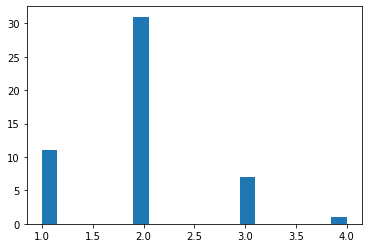

In [ ]:
%matplotlib inline 

plt.hist(df['Kategori'], bins=20)
plt.show

<function matplotlib.pyplot.show>

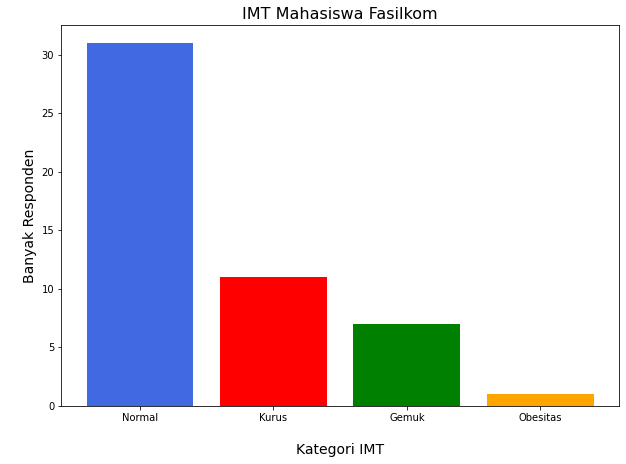

In [ ]:
count = df['Kategori'].value_counts()
plt.figure(figsize=(10, 7))

#buat bar plot

plt.bar(['Normal','Kurus','Gemuk','Obesitas'], count, color=['royalblue','red','green','orange'])

plt.xlabel('\nKategori IMT', size=14)
plt.ylabel('\nBanyak Responden', size=14)
plt.title('IMT Mahasiswa Fasilkom', size=16)
plt.show